<a href="https://colab.research.google.com/github/UltraTsar/NonTrivialRepE_Timeline/blob/main/stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -U scikit_posthocs

Kruskal-Wallis H-test:
H-statistic: 33.073623188405804
p-value: 5.973516146416213e-05

Dunn's test results:
          1         2         3         4         5         6         7  \
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  1.000000  1.000000  1.000000  0.202501  1.000000  0.188026  1.000000   
3  1.000000  1.000000  1.000000  0.020708  1.000000  0.018939  1.000000   
4  1.000000  0.202501  0.020708  1.000000  1.000000  1.000000  1.000000   
5  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
6  1.000000  0.188026  0.018939  1.000000  1.000000  1.000000  1.000000   
7  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
8  0.749171  1.000000  1.000000  0.000473  0.291069  0.000423  0.905199   
9  1.000000  1.000000  1.000000  0.540873  1.000000  0.505956  1.000000   

          8         9  
1  0.749171  1.000000  
2  1.000000  1.000000  
3  1.000000  1.000000  
4  0.000473  0.540873  
5  0.291069  1.000000

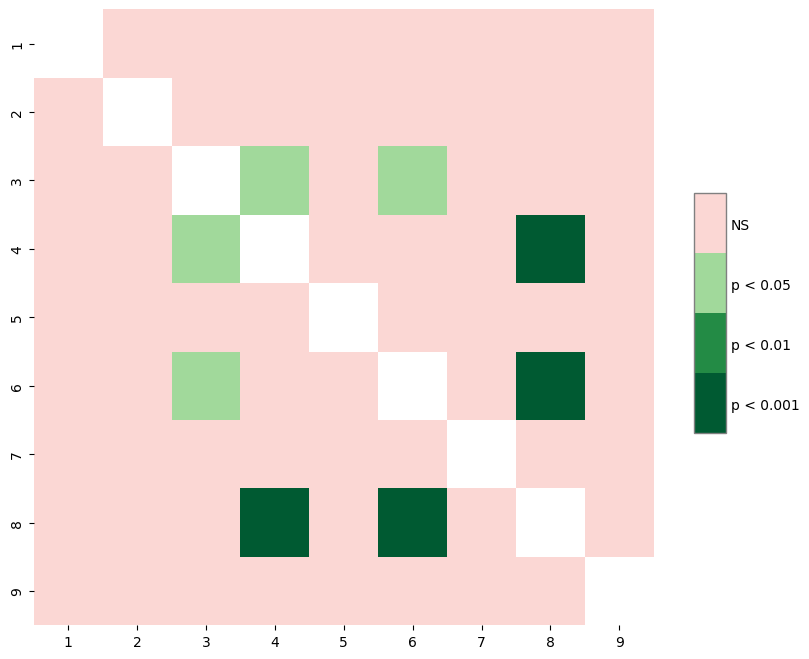

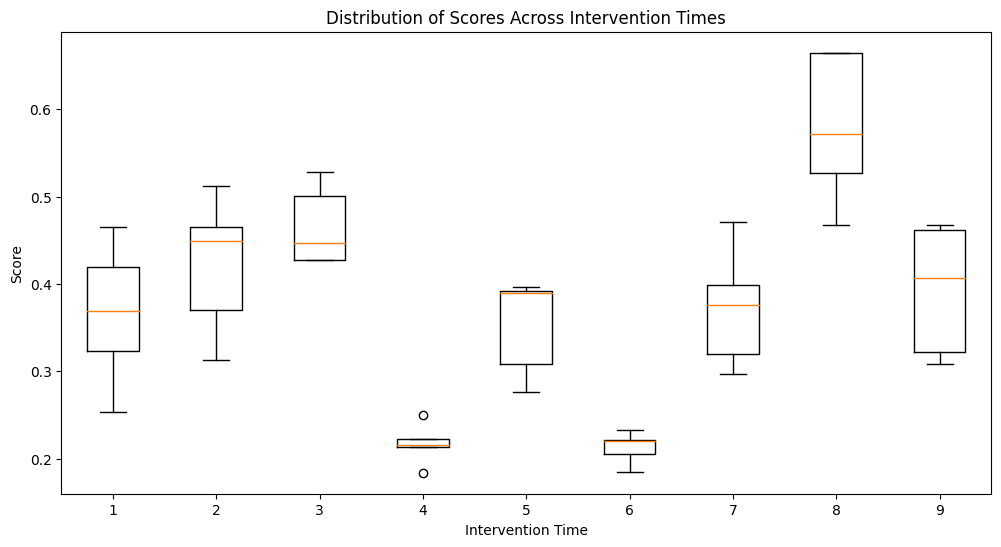

In [14]:
import numpy as np
from scipy import stats
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import pandas as pd

# Your data
data = {
    '1': [0.368488, 0.465249, 0.3232887, 0.25305767, 0.41946689],
    '2': [0.312576, 0.512127, 0.37030648, 0.44928616, 0.46487115],
    '3': [0.426935, 0.528289, 0.50109207, 0.42693513, 0.44637955],
    '4': [0.183791, 0.215391, 0.25018222, 0.21290369, 0.22210311],
    '5': [0.39665, 0.39232, 0.3088206, 0.27569216, 0.39002141],
    '6': [0.233269, 0.220891, 0.2056034, 0.18453797, 0.22024726],
    '7': [0.31952, 0.471197, 0.29698388, 0.39851331, 0.37614331],
    '8': [0.526561, 0.467142, 0.57211675, 0.664679, 0.66398725],
    '9': [0.406858, 0.467412, 0.30853457, 0.32221121, 0.46192455]
}

# Kruskal-Wallis H-test
h_statistic, p_value = stats.kruskal(*data.values())

print(f"Kruskal-Wallis H-test:")
print(f"H-statistic: {h_statistic}")
print(f"p-value: {p_value}")

# Prepare data for Dunn's test
df = pd.DataFrame({group: pd.Series(values) for group, values in data.items()})
df_melt = df.melt(var_name='group', value_name='value')

# Perform Dunn's test
dunn_results = sp.posthoc_dunn(df_melt, val_col='value', group_col='group', p_adjust='bonferroni')

print("\nDunn's test results:")
print(dunn_results)

# Visualization of Dunn's test results
plt.figure(figsize=(8, 8))
sp.sign_plot(dunn_results)
#plt.title("Dunn's Test Pairwise Comparisons")
plt.show()

# Box plot
plt.figure(figsize=(12, 6))
plt.boxplot(data.values(), labels=data.keys())
plt.title("Distribution of Scores Across Intervention Times")
plt.xlabel("Intervention Time")
plt.ylabel("Score")
plt.show()